<a href="https://colab.research.google.com/github/sabinagio/IronSabina/blob/main/data_viz_returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Once again... data visualization!

In [7]:
# You can comment this out if you saved this locally
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Why do we need data visualization?

> Graphics reveal data features that statistics and models may miss: unusual distributions of data, local patterns, clusterings, gaps, missing values, evidence of rounding or heaping, implicit boundaries, outliers, and so on. Graphics raise questions that stimulate research and suggest ideas. It sounds easy. In fact, interpreting graphics needs experience to identify potentially interesting features and statistical nous to guard against the dangers of overinterpretation. (nous ~ intelligence)

## EDA vs EDA - a quick reminder

**Exploratory Data Viz** - visualizations meant for identifying patterns or anomalies in data and starting to hypothesize

Exploratory graphs would typically:
- be rough sketches
- be used (and understood) by analysts
- look at many variables at once
- have a simple, descriptive title

**Explanatory Data Viz** - visualizations meant to convey a specific insight

Explanatory graphs would typically:
- be refined charts
- be created by analysts, understood by anyone
- focus on one-two variables of interest
- have a takeaway point as a title

In [55]:
# I promise I will get you to use plotly by the end of this bootcamp...
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Change file path to your file path if needed
file_path = '/content/drive/MyDrive/DATA PT 23/Unit 4/Week 11/Data Viz Sabina/we_fn_use_c_marketing_customer_value_analysis.csv'

data = pd.read_csv(file_path)
pd.set_option('display.max_columns', 500)  # so we can see all columns at once, 500 can be a bit overkill but doesn't matter here

## Visualizing one feature (univariate analysis)

In [11]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


What data do we have?
- numerical continuous: Customer Lifetime Value, Income, Total Claim Amount, Monthly Premium Auto
- numerical discrete: Number of Open Complaints, Number of Policies because they're both integer numbers and the maximum value is not higher than 10 for either of them, so very few values
- categorical: State, Response, Coverage, Education, Employment Status, Gender, Location Code, Marital Status, Policy, Policy Type, Renew Offer Type, Sales Channel, Vehicle Class, Vehicle Size
- time: effective to date  
- ID: Customer ID

At this point I am unsure if Months Since Last Claim, Months Since Policy Inception are numerical discrete/continuous, therefore I need to see some plots!

Months Since Last Claim is a bit in-between, so you could treat it as either discrete or continuous:

In [14]:
fig = px.histogram(data, x='Months Since Last Claim')
fig.update_layout(bargap=0.2)
fig.show()

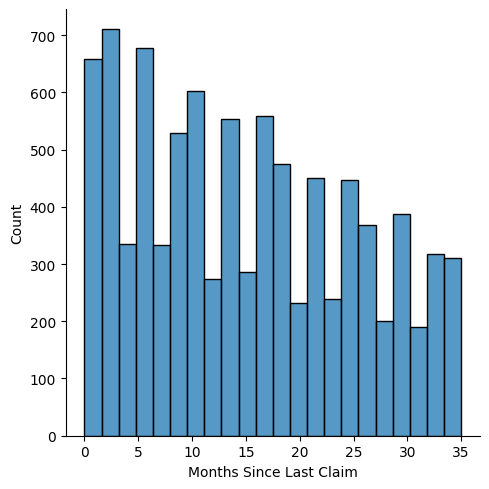

In [13]:
sns.displot(data, x='Months Since Last Claim')

Months Since Policy Inception is also a bit in between. I would treat it as a numerical continuous variable to not add too much noise to the model. I would not do any transformation on it as it clearly has a uniform distribution.

In [15]:
fig = px.histogram(data, x='Months Since Policy Inception')
fig.update_layout(bargap=0.2)
fig.show()

### 1. Numerical continuous

#### ✅Histograms

In [ ]:
px.histogram(data, x='Income')

### 2. Numerical discrete

#### ✅Barplots  


When plotly has to do a barplot on a numerical continuous variable, it uses the index as the y-axis, so it plots every value for every customer, which is why you can't see anything here:

In [18]:
px.bar(data, y='Number of Open Complaints')  # Plotly doesn't really do aggregates in the bar plot... 

In [21]:
px.histogram(data, x='Number of Open Complaints') # And it does a poor job in histogram form, unless you add a bar gap

In [20]:
fig = px.histogram(data, x='Number of Open Complaints') # And it does a poor job in histogram form, unless you add a bar gap
fig.update_layout(bargap=0.2)
fig.show()

<Axes: ylabel='Number of Open Complaints'>

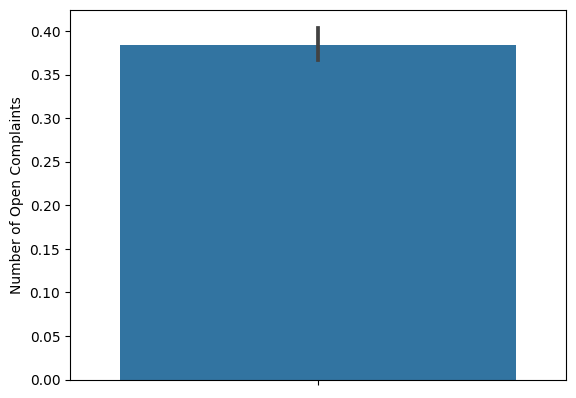

In [ ]:
import seaborn as sns
sns.barplot(data, y='Number of Open Complaints')  # Seaborn is also not great at barplots with numerical discrete data

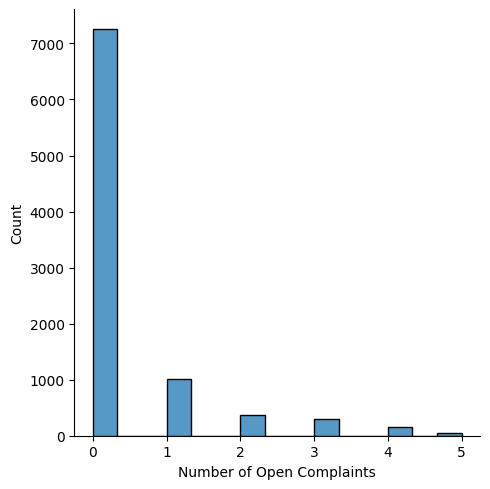

In [ ]:
sns.displot(data, x='Number of Open Complaints')  # so yes, you can use a histogram BUT please... don't expect normal distributions!!!

#### ❌ Boxplots  

Not inherently wrong, but the purpose of a box plot is to have a look at outliers. However, a numerical discrete variable has too few values to have any outliers!

In [ ]:
px.box(data, x='Number of Open Complaints') # Hover to see more details

#### ❌Lineplots 

In [80]:
px.line(data, y='Number of Open Complaints')   # mmmyeah, I think you get it!

#### 🆗(ish) Histograms

Plotly doesn't really like this

In [82]:
px.histogram(data, y='Number of Open Complaints')

In [ ]:
px.histogram(data, y='Number of Open Complaints')


Look, this is OK

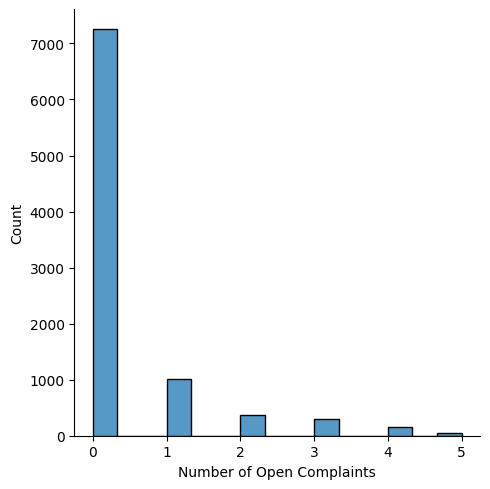

In [83]:
sns.displot(data, x='Number of Open Complaints')


#### 🆗(ish) Scatterplots 

In [84]:
px.scatter(data, x='Number of Open Complaints')

### 3. Categorical

#### ✅Barplots  


In [85]:
px.bar(data, x='Gender')  

In [86]:
px.histogram(data, x='Gender')  # its histogram function works nicely

#### ❌ Boxplots  

In [87]:
px.box(data, x='Gender') # I won't even try to explain this one

#### ❌Histograms

In [88]:
px.histogram(data, x='Gender')  # Same as the bar plot

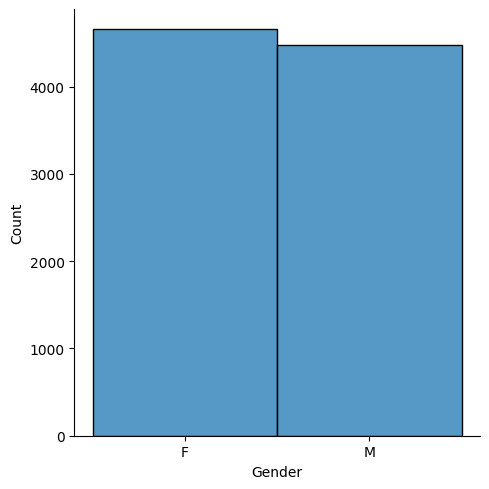

In [ ]:
sns.displot(data, x='Gender') # Same as a barplot...

#### ❌Lineplots 

In [89]:
px.line(data, x='Gender')  # not very insightful either


#### 🆗(ish) Scatterplots 

In [90]:
px.scatter(data, x='Gender')  # Nothing to see here...

## Common mistakes!

### 1. Plotting without understanding what you're plotting (e.g. `customer_id`)

In [ ]:
px.bar(data, x='Customer')

### 2. Doing barplots for numerical continuous data

<Axes: ylabel='Income'>

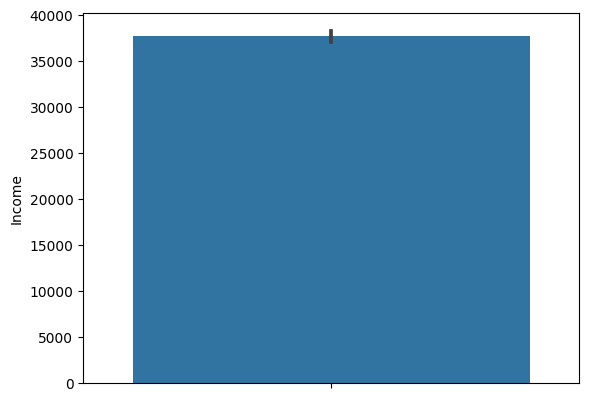

In [77]:
sns.barplot(data, y='Income')

### 3. Doing boxplots for numerical discrete data

In [ ]:
px.box(data, x='Number of Open Complaints')

### 4. Considering histograms on numerical discrete data as normal distributions

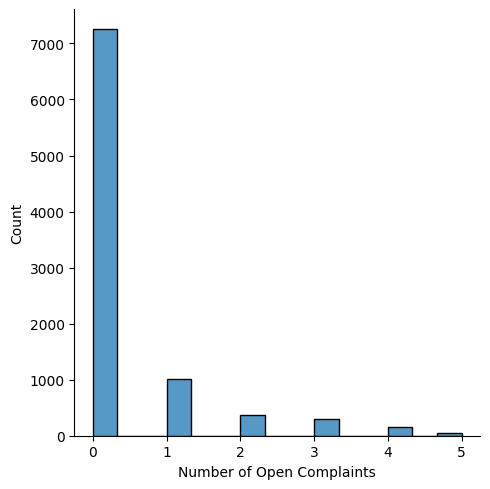

In [27]:
sns.displot(data, x='Number of Open Complaints')

### 5. Creating noisy plots

<Axes: xlabel='Effective To Date', ylabel='Total Claim Amount'>

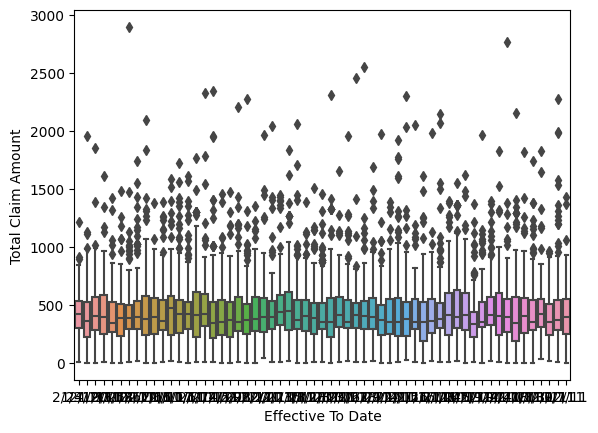

In [28]:
sns.boxplot(data, x='Effective To Date', y='Total Claim Amount')

You can make the plot wider!!!

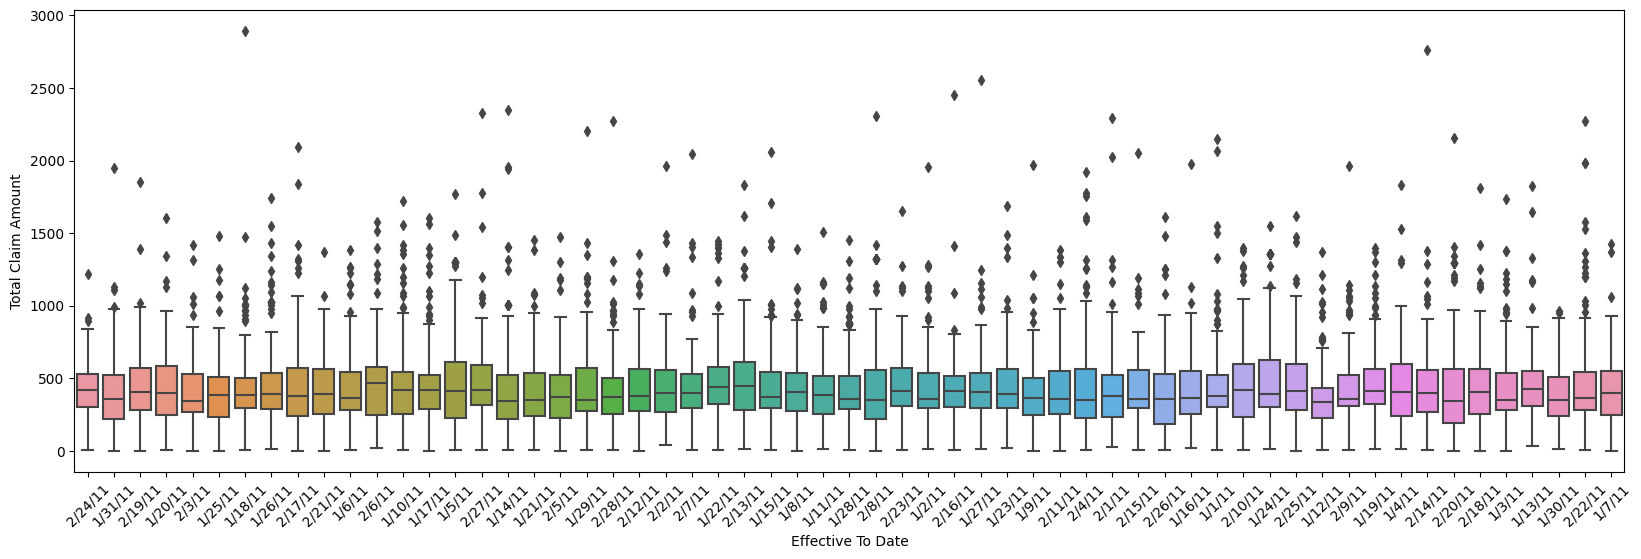

In [35]:
# Matplotlib and Seaborn can work together
fig, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(data, x='Effective To Date', y='Total Claim Amount')
plt.xticks(rotation=45)
plt.show()

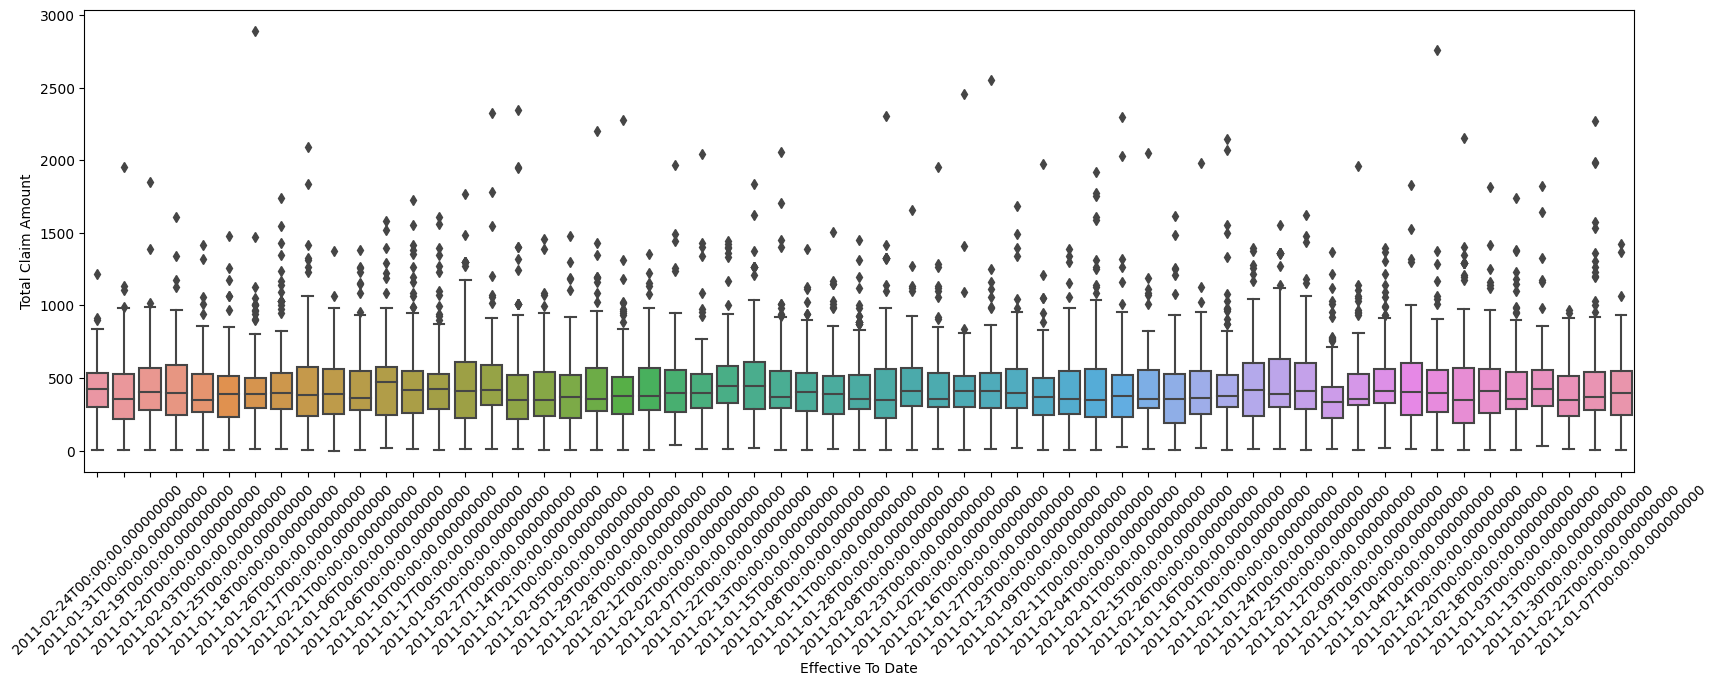

In [78]:
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'])
fig, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(data, x='Effective To Date', y='Total Claim Amount')
plt.xticks(rotation=45)
plt.show()

In [79]:
# Or use plotly (and hover for details)
px.box(data, x='Effective To Date', y='Total Claim Amount')

## Questions!

### 1. To what extent is it possible to evaluate correlation between variables using plots? 

*Which plots to use? 2 numericals: pairplot? 2 categoricals? 1 categorical and 1 numerical?*

To a small extent. You should always rely on the actual numerical values when deciding to keep/remove features based on correlation.

Then, in terms of the plots you use:
- Heatmaps - they're perfect if you simply want to see if a variable is correlated and if it's positively/negatively correlated. Works for all variables but you have to choose the right correlation method, i.e. Pearson, Chi squared or another one.
- Pairplots - they're useful if you want to see if there are any other types of relationships between variables, i.e. not just monotonous. Just don't use them for *all* your variables, otherwise it gets noisy! It makes most sense to use with numerical continuous variables.

In [61]:
num_data = data.select_dtypes(np.number)
fig = px.scatter_matrix(num_data)
fig.update_layout(height=1500, width=1500)
fig.update_layout(font_size=10, font_family='lato')
fig.show()

### 2. How to interpret the plots with the result of ML models?

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

X = data.select_dtypes(np.number)
X = X.drop(['Total Claim Amount'], axis=1)
y = data['Total Claim Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

When looking at predicted versus real results you'd ideally want all of the points to be on the line. However, how much the data is spread will show you how good your model fit is:

In [67]:
px.scatter(x=y_test, y=y_pred, trendline='ols')

<Axes: xlabel='Total Claim Amount'>

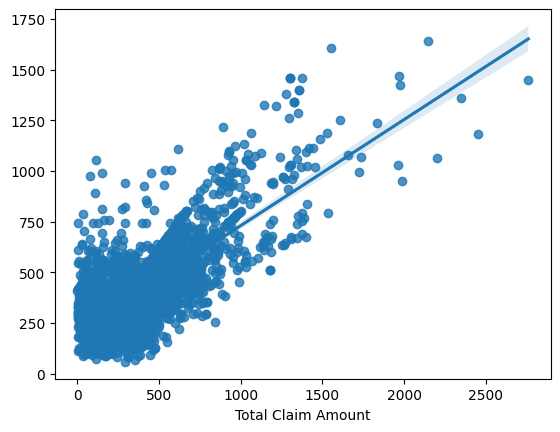

In [66]:
sns.regplot(x=y_test, y=y_pred)

### 3. How to plot a time variable and how to interpret the plot?

It... depends.  

If you are interested in plotting a time variable **alone**, then you'd be interested to see things like:
- the time period covered by the dataset
- if there are any patterns in terms of when the data was recorded, e.g. more records in December compared to November 

You can do this using a simple barplot which counts the number of records per time frame:



In [38]:
time_series = px.data.stocks()
time_series.date = pd.to_datetime(time_series.date)   # Needed for the later plot
time_series.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


In [39]:
# Date range
px.bar(time_series, x='date')

We can already see we have one record for each week in the dataset and that we have 2 years worth of data. However, what is usually more interesting to see is how a certain feature varies over time! Now, depending on what that feature is you will use different types of charts to visualize its variation:
- numerical continuous data (e.g. stock prices during a day):
  - scatterplots
  - boxplots / candlestick plots
  - line charts (using an aggregation, e.g. count/average)
  - histograms (to examine patterns within a day, e.g. if a stock was more on the lower/high side on a specific day/week/month)

Our stock data is provided on a weekly basis (and there isn't much of it), so the easiest plot we can use is a line chart to examine any weekly patterns in stock price:

In [ ]:
px.line(time_series, x='date', y='GOOG')

When analyzing just the Google stock, we can see that:
- the highest prices occurred in August 2018, April 2019, December 2019
- the lowest prices occurred in April 2018, December 2018, June 2019

From this we can see that in 2018 Google stock would increase then decrease once every quarter (could be related to quarterly financial statements being released?) 

We can also look at a comparison between two stocks and see how they vary in time. For example, we can see that Apple grew in value much more than Google in the 2 years that the data cover.

In [ ]:
px.line(time_series, x='date', y=['GOOG', 'AAPL'])

Using a scatterplot with a trendline (OLS = Ordinary Least Squares, a linear regression model) we can clearly observe how the Apple stock overall outperformed the Google stock over the years.

In [40]:
px.scatter(time_series, x='date', y=['GOOG', 'AAPL'], trendline='ols')

Our stock data is provided on a weekly basis (and there isn't much of it), so if we want to look at items like boxplots/histograms, we need to bin our data. In our case, we could do that by looking at monthly patterns instead of weekly ones. However, we can do that with our Effective to Date column!

In [70]:
data['Effective To Date'] = pd.to_datetime(data['Effective To Date']) # The data is not correctly formatted, so it will be shown disorderly

Box plots are great to see outliers at some points in time but it's not very easy to observe trends in the Total Claim Amount

In [44]:
px.box(data, x='Effective To Date', y='Total Claim Amount')

In [72]:
px.scatter(data, x='Effective To Date', y='Total Claim Amount', trendline='ols')

<Axes: xlabel='Effective To Date', ylabel='Total Claim Amount'>

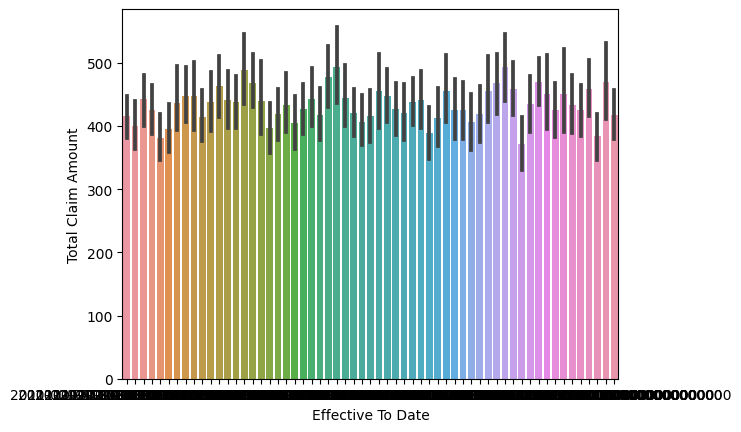

In [76]:
sns.barplot(data, x='Effective To Date', y='Total Claim Amount')